In [1]:
import cv2
import numpy as np

In [2]:
filename = '/Users/yelin/Downloads/target_long/bev/6030m640320p_filtered/0.png'

# read target bev
bev = cv2.imread(filename)

In [3]:
# distinguish road(85), lane(255), intersection(170), ignore(0)
bev = np.mean(bev, 2)

bev[bev<42] = 0
road = (bev>43)*(bev<=127)
bev[road] = 85

inter = (bev>127)*(bev<=212)
bev[inter] = 170

bev[bev>212] = 255
print(np.unique(bev))

[  0.  85. 255.]


In [12]:
# generate lane, intersection target
h, w = bev.shape

lane_tgt = np.full((h, w, 3), (255, 255, 255), dtype=np.uint8)
intr_tgt = np.full((h, w, 3), (255, 255, 255), dtype=np.uint8)

lane_tgt[bev==255,:] = (0, 102, 0)
intr_tgt[bev==170, :] = (153, 204, 255)

In [13]:
# generate target for visualization
all_tgt = np.full((h, w, 3), (255, 255, 255), dtype=np.uint8)

all_tgt[bev==255,:] = (0, 102, 0)
all_tgt[bev==170, :] = (153, 204, 255)

In [17]:
# generate curb target
curb_tgt = np.full((h, w, 3), (255, 255, 255), dtype=np.uint8)

road = np.zeros_like(bev, dtype=np.uint8)
road_mask = np.logical_or(bev==255, bev==85)
road_mask = np.logical_or(road_mask, bev==170)
road[road_mask] = 255

# calculate curb using canny edge detection
edges = cv2.Canny(road, 100, 200)

curb_tgt[edges==1, :] =(255, 0, 0)

# target.shape
ex_idx, ey_idx = np.where(edges == 255)

print(ey_idx.shape)
min_ex_idx = ex_idx-1
min_ex_idx[min_ex_idx < 0] = 0

max_ex_idx = ex_idx+1
max_ex_idx[max_ex_idx > 512] = 512

min_ey_idx = ey_idx-1
min_ey_idx[min_ey_idx < 0] = 0

max_ey_idx = ey_idx+1
max_ey_idx[max_ey_idx > 512] = 512

print(max_ey_idx.shape)
for min_x, max_x, min_y, max_y in zip(min_ex_idx, max_ex_idx, min_ey_idx, max_ey_idx):
    curb_tgt[min_x:max_x, min_y:max_y, :] = (255, 0, 0)
    all_tgt[min_x:max_x, min_y:max_y, :] = (255, 0, 0)

(481,)
(481,)


In [18]:
all_tgt.shape

(160, 80, 3)

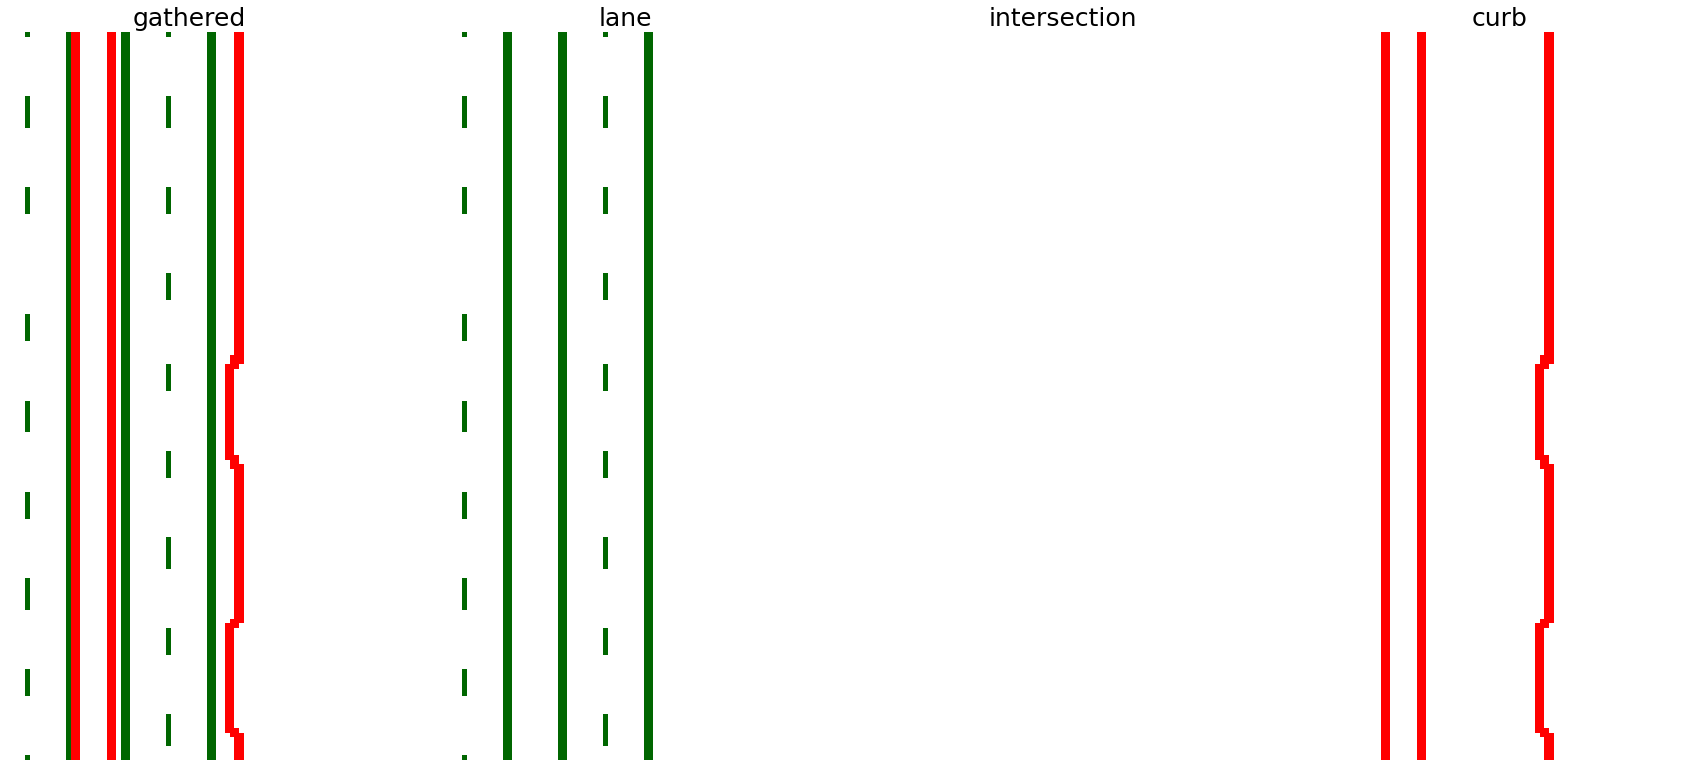

In [29]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(30, 60))

ax1 = f.add_subplot(141)
ax1.set_title(f"gathered", fontsize=25)
ax1.axis('off')
ax1.imshow(all_tgt)

ax2 = f.add_subplot(142)
ax2.set_title(f"lane", fontsize=25)
ax2.imshow(lane_tgt)
ax2.axis('off')

ax3 = f.add_subplot(143)
ax3.set_title(f"intersection", fontsize=25)
ax3.imshow(intr_tgt)
ax3.axis('off')

ax4 = f.add_subplot(144)
ax4.set_title(f"curb", fontsize=25)
ax4.imshow(curb_tgt)
ax4.axis('off')

plt.show()